# Python core

## Типы объектов, а так же работа с ними 

## Функции

## Обработка исключений

## Менеджеры контекста и инструкция with

class Hello:
    def __del__(self):
        print('Деструктор')
    def __enter__(self):
        print (вход в блок)
    def __exit__(self, exp_type, exp_value, traceback):
        print (выход из блока)


Пример использования 
class Open(object):
    def __init__(self, file, flag):
        self.file = file
        self.flag = flag

    def __enter__(self):         #вызывается до входа в конструкцию with
        try:
            self.fp = open(self.file, self.flag)
        except IOError:
            self.fp = open(self.file, "w")
        return self.fp

    def __exit__(self, exp_type, exp_value, exp_traceback):   #вызывается после входа в конструкцию with
        """ подавляем все исключения IOError """
        if exp_type is IOError:
            self.fp.close() # закрываем файл
            return True
        self.fp.close() # закрываем файл

with Open("asd.txt", "w") as fp:
    fp.write("Hello, World\n")
    
    
переменные exp_type - класс исключения, которое было возбужено, если не было возбуждено, то None
           exp_value — сообщение исключения, если не было возбуждено, то None
           exp_traceback - стек исключений, который возвращается при исключении в блоке
           
           
    фУНКЦИЯ-МЕНЕДЖЕР
    
import contextlib
@contextlib.contextmanager  #декоратор, который делает функцию менеджером
def context():
    print ('вход в блок')
    try:
        yield {}                    #позволяет ждать, пока не закончится работа внутри блока
    except RuntimeError, err:
        print ('error: ', err)
    finally:
        print ('выход из блока')

with context() as fp:
    print ('блок')
    


##  Генераторы. Итераторы

Где их можно встретить и ососбенности генератора:
1. Использование генератора 2жды
   squared_numbers = (number**2 for number in range(10))
   print(list(squared_numbers))  #полностью растягивает генератор
   print(list(squared_numbers))
   
   Получается следующее:
       [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
       []
    
2. Проверка элементов в генераторе 2жды:
   squared_numbers = (number**2 for number in range(10))
   >>> 4 in squared_numbers
   True
   >>> 4 in squared_numbers
   False
   
   
3. Распаковка словаря
   fruits_amount = {'apples': 2, 'bananas': 5}
  x, y = fruits_amount # То есть опять же идет итерацией





    Итераторы
По-сути, вся разница, между последовательностями и итерируемымыи объектами, заключается в том, что в последовательностях элементы упорядочены. (итерабельные объекты - все объекты, которые имеют метод __iter__)

Сами по себе итерируемые объекты могут быть не упорядочены, но могут быть использованы во время итерации


Итераторы — это такие штуки, которые, очевидно, можно итерировать :)
Получить итератор мы можем из любого итерируемого объекта.
Короч все объекты , которые имеют метод __iter__ (map, filter, reduce, zip и тд)

Для этого нужно передать итерируемый объект во встроенную функцию iter:
set_of_numbers = {1,2,3}
iter_of_numbers = iter(set_of_numbers)

После того, как мы получили итератор, мы можем передать его встроенной функции next:
next(iter_of_numbers)
>>>1
next(iter_of_numbers)
>>>2
next(iter_of_numbers)
>>>3
Далее итератор выходит за пределы и вщзвращает ошибку


РЕАЛИЗАЦИЯ ЦИКЛА for ПРИ ПОМОЩИ ИТЕРАТОРА

def for_loop(iterable, loop_body_func):  #передается итерабельный объект и функция для выполнения
    iterator = iter(iterable)
    next_element_exist = True
    while next_element_exist:
        try:
            element_from_iterator = next(iterator)
        except StopIteration:
            next_element_exist = False
        else:
            loop_body_func(element_from_iterator)

В общем, ПРОТОКОЛ ИТЕРАТОРА формализован при помощи iter и next



    Собственный итератор

class InfiniteSquaring:
"""Класс обеспечивает бесконечное последовательное возведение в квадрат заданного числа."""
    def __init__(self, initial_number):
        # Здесь хранится промежуточное значение
        self.number_to_square = initial_number
    def __next__(self):
        # Здесь мы обновляем значение и возвращаем результат
        self.number_to_square = self.number_to_square ** 2
        return self.number_to_square
    def __iter__(self):
        """Этот метод позволяет при передаче объекта функции iter возвращать самого себя, тем самым в точности реализуя протокол итератора."""
        return self



ЕЩЕ ОДИН ПРИМЕР ИТЕРАТОРА

class SimpleIterator:
    def __iter__(self):
        return self
    def __init__(self, limit):
        self.limit = limit
        self.counter = 0
    def __next__(self):
        if self.counter < self.limit:
            self.counter += 1
            return 1
        else:
            raise StopIteration

s_iter2 = SimpleIterator(5)
for i in s_iter2:
    print(i)
    
    
    
    Генераторы 


   

    
    
f = (x for x in xrange(100)) # выражение - генератор, котороый возвращет объект -генератор
c = [x for x in xrange(100)] # генератор списк, создает новый список


пример использвания генераторы-функции
def prime(lst):
    for i in lst:
        if i % 2 == 0:
            yield i

>>> f = prime([1,2,3,4,5,6,7])
>>> list(f)
[2, 4, 6]


def simple_generator(val):
   while val > 0:
       val -= 1
       yield val



yield from (i for i in range(first, last) if i % 2 == 0) #как вариант использования yield вместо цикла 

при вызове yield функция не прекращает работу, как с return, а ждет до очередной итерации 



Особенность генератора в том, что если мы создаем функцию с yield, то при вызове ее сразу нам возвращается объект-генератор. При этом при первом next() генерация идет до первого yield, а на нем замирает. 


Можно еще принимать аргументы через yield:





def subgen():
    x = 'ready to accept message'
    message = yield x  # first of all yield returns x. then receives values
    print('subgen recieved: ', message)


g = subgen()
print(g.send(None))  # we can pass on argument, but first argument should be None because first next works up to yield.
g.send(1)


Методы генератора: 
next(g)
g.send(1) #отправляем значения на yield
g.throw(StopIteration) #выкинуть ошибку 




Можно отслеживать состояние генераторов при помощи:
    from inspect import generatorstate 
    getgeneratorstate(generator)




## Множественное наследование. MRO

MRO - method resolution order (порядок разрешения метода)
Изначально было такой вид наследования: по левой ветке (о последнего элемента), и только потом по правой (deep first). Причина тому, что не было общего предка. 

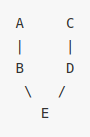


Это породило проблему "ромбовидной структуры": потому что каждый класс наследуется от object и правые ветки вообще не рассматриваются. 

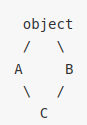

Линеризацией класса называется упорядоченный список классов, в котором поиск метода будет происходить слева направо.  

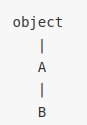


Итоги: 
линеаризацией класса называется список из самого класса и всех его предков (родителей и прородителей) в котором по порядку слева направо будет производиться поиск метода.

порядок разрешения методов (MRO) — это способ, с помощью которого составляется линеаризация класса.

монотонность — это свойство, которое требует соблюдения в линеаризации класса-потомка того же порядка следования классов-прородителей, что и в линеаризации класса-родителя.

порядок локального старшинства — это свойство, которое требует соблюдения в линеаризации класса-потомка того же порядка следования классов-родителей, что и в его объявлении.

a.mro() - вызывает последоватеьность классов (по порядку смотреть алгоритм С3-линеаризации)

     Короче
До python3 было наследование deep first (можно сказать, что поиск в глубину), c python3 (как появился object) MRO стало С3


Совсем упрощенно C3 алгоритм MRO можно представить так:

в список добавляются родители объекта
    в конец списка добавляет список родителей этих родителей
    и так далее
    
если какой-то класс оказывается в списке дважды, то оставляется только последнее его вхождение.


С3
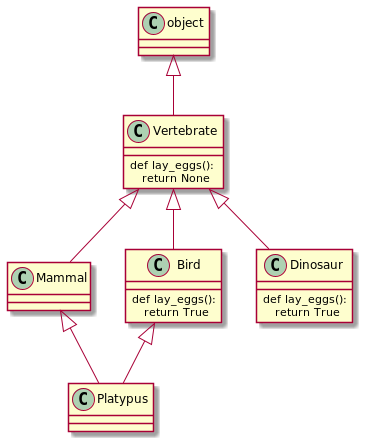

Получается следующим образом: Playtypus->Mammal->Bird->Vertebrate->object



    super()

Данная функция позволяет использовать следующие методы классов по MRO 

super(ClassName).__init__() - в скобках указыввается класс, от которого возьмем метод/поле

class Vertebrate:
    def __init__(self):
        print('Vertebrate.__init__()')

class Bird(Vertebrate):
    def __init__(self):
        print('Bird.__init__()')
        super().__init__()

class Mammal(Vertebrate):
    def __init__(self):
        print('Mammal.__init__()')
        super().__init__()

class Platypus(Mammal, Bird):
    def __init__(self):
        print('Platypus.__init__()')
        super().__init__()

duckbill = Platypus()



Platypus.__init__()
Mammal.__init__()
Bird.__init__()
Vertebrate.__init__()



super() вызывает методы в соответствии с MRO
 

## ООП

## Декораторы

In [ ]:
#Ввод: что такое декоратор  - это функция, которая "оборачивает" другую функцию. То есть функция(1) принимает на вход 
#функцию(2), функция(1) внутри себя имеет описание функции-обертки(3), функция (1) возвращает функцию(3) как объект, 
#внутри которой вызывается наша передаваемая функция:

def decorator(func):
    print("check 1 ")

    def wrapper():
        print("check 2 ")
        func()
        print("check 3 ")
    return wrapper

def a():
    print("I'm decorated")

a = decorator(a)
a()

#Использование @


def decorator(func):
    print("check 1 ")

    def wrapper():
        print("check 2 ")
        func()
        print("check 3 ")
    return wrapper

@decorator #То есть грубо говоря переписывается функция a, теперь является функцией wrapper
def a():
    print("I'm decorated")


    
#ПЕРЕДАЧА АРГУМЕНТОВ В ДЕКОРИРУЕМУЮ ФУНКЦИЮ

#1 способ
# В данном способе функции wrapper и a принимают одинаковые аргументы, посколкьку по сути после декорирования вызывается 
# вначале wrapper, в который передаем аргументы, а только потом функция a, в которую передаются аргументы с wrapper 
#(посути как глобальные) 
def decorator(func):
    print("check 1 ")

    def wrapper(*args, **kwargs):
        print("check 2 ")
        func(args, kwargs)
        print("check 3 ")
    return wrapper

@decorator
def a(*args, **kwargs):
    print(args)
    print(f"I'm decorated {args}")

a('ab', 'cd', [1, 2, 3], abcd = 5)


#2 способ
#В данном же способе мы передаем парметры не через саму функцию, а через внешний декоратор. То есть Первый декоратор
#получает аргумент и делает их глобальными для функции decorator2. decorator1 возвращает decorator2, таким образом 
#@decorator1(...) первращается в @decorator2 и далее по накатанной (используя глобальные переменные). Основное отличие 
#в том, что мы передаем аргументы не через вызываемую функию, а через декоратор
 
def decorator1(*args, **kwargs):
    def decorator2(funct):
        def wrapper():
            print('Enter1')
            funct(*args, **kwargs)
            print('Enter2')

        return wrapper

    return decorator2


@decorator1('a', name='Vlad')
def function(*args, **kwargs):
    print(args, kwargs)


function()


#Таким образом функцию можно оборачивать безограниченно


def decorator1(a):
    print(a)
    def decorator2(b):
        print(b)
        def decorator3(funct):
            def wrapper():
                print('Enter1')
                funct(a, b)
                print('Enter2')
            return wrapper
        return decorator3
    return decorator2

@decorator1('a')('b')
def function(*args):
    print(args)

function()




#Lambda декоратор (декоратор, представленный лямбда функцией)
lambda_decorator = lambda func: lambda *args: func(*args) + 1
@lambda_decorator
def function(x):
    return x

print(function(1))



#Класс-декоратор
#мы опять же декорируем простую функцию при помощи класса, а именно когда вызываем @Logger, первым делом вызывается 
# __init__ класса Logger, который в свою очередь делает функцию полем объекта, и возвращает сам объект. То есть
# по сути можно сказать, что my_method в данный момент вообще просто является объектом!!! Когда же мы его вызываем 
#(obj.my_method), то вызывается функция __call__, которая и является оберткой и вызывает нашу функцию 

class Logger:
    def __init__(self, func):
        self.func = func

    def __call__(self, *args, **kwargs):
        print(f'Calling method "{self.func.__name__}" with arguments {args} and keyword arguments {kwargs}')
        return self.func(*args, **kwargs)


class MyClass:
    @Logger
    def my_method(self, x, y):
        return x + y


obj = MyClass()
obj.my_method(3, 4)


## Области видимости 

In [3]:
#Локальная область:
#В общем, за блоками не работает, но если переменная объявлена глобально, то может обращаться к ней
#Python
x = 10
 
def my_func(a, b):
    print(x)
 
my_func(1, 2) # выведет x

#здесь же мы меняем переменную внутри функции
def my_func(a, b):
    x = 5
    print(x)
 
 
if __name__ == '__main__':
    x = 10
    my_func(1, 2) #выведет 5
    print(x) #выведет 10

    
#А в данном моменте прикол в том, что если мы определяем переменую внутри блока и пыытаемся использовать глобальную,
#то можно хорошенько получить пизды, объясняется тем, что питон проверяет функцию на создаение переменной

def my_func(a, b):
    print(x)
    x = 5
    print(x)
 
 
if __name__ == '__main__':
    x = 10
    my_func(1, 2)
    print(x)

    
    
    
#Глобальные переменные
#Как я понял, глобальная переменная объявляется исключительно во внешнем блоке
#в блоке используется слово global, теперь эта переменная может использоваться и изменяться внутри этого блока:
def my_func(a, b):
    global x
    print(x)
    x = 5
    print(x)
 
 
if __name__ == '__main__':
    x = 10
    my_func(1, 2) #Выведет 10 5
    print(x) #выведет 5
    

    


    
    
#Нелокальная переменная
#Здесь же, как и глобаьная, только переменная с внешнего блока:

def f1():
    x = 100
    def f2():
        nonlocal x
        x = 200
    f2()
    print(x) #200
f1()



#Глобальная переменная в классе
#Заметка: Получается так, что при проходе по коду вначале читается класс и все его поля, а так же методы, поэтому x 
#меняется, как только интерпретатор проходит по этому месту кода
x = 100
print(x)
class c1:
    global x
    x = 200
    def __init__(self):
        global x
        x = 300
    def f(self):
        global x
        x = 400
print(x)
o1 = c1()
print(x)
o1.f()
print(x)

# 100
# 200
# 300
# 400

10
5
10


UnboundLocalError: local variable 'x' referenced before assignment

## Modules in Python

Модуль - это файл с расширением .py
Пакет - папка c файлом __init__.py

Во время import mod import оператор import ищет списке каталогов, собранных из следующих источников:
0. В sys.modules - это просто хэш всех импортированных ранее модулей
1. Каталог, из которого был запущен входной скрипт (то есть папка с нашим файлом)
2. Всторенные модули в коровский питон
3. Список каталогов, содержащихся в PYTHONPATHпеременной окружения, если она установлена. 
PYTHONPATH - переменная среды (которая содержит список директорий, в которых интерпретатор Python будет искать модули при их импорте.) В него можно добавлять дирректории через консоль либо через питоновский модуль sys.path.append(r'path...')
3. Стандартные места установки Python, таких как директория site-packages в корневой директории Python
4. Если не найдено, выведет ImportError

!Каждый импортированный модуль имеет свое адресное пространство для того, чтобы можно было использовать одинаковые переменные. 



IMPORT

import module
module.a = 123

Таким образом мы импортируем весь модуль, но сами переменные и функции по сути находятся в пространстве имен этого модуля. То есть когда мы меняем таким образом переменну module.a = 123, то переменная меняется и в пространстве имен самого модуля. 


from module import name 
name = 123 
from module import *
Таким образом мы импортируем объект и теперь он у нас в адресном пространстве. Если импортируем через *, то мы импортируем все переменные и функции, НО ЭТО ОПАСНО ПЕРЕЗАПИСЬЮ ПЕРЕМЕННЫХ, поэтому в данном случае лучше всего делать копию переменных и импортировать следующим образом: 

from module import name as my_name



СКРИПТ-ФАЙЛ
Все очень просто! Если основной файл, который запускаем, то __name__='__main__', таким образом можно проверять, явлется ли файл скриптом или модулем



ПЕРЕЗАГРУЗКА МОДУЛЯ
Когда мы импортируем несколько раз модуль, то он создается один раз, все же остальные случаи просто ссылаются на первый. Однако, когда модуль изменяется, его необходимо обновлять! Чтобы адресное пространство обновилось, его можно обновлять следующим способом: либо через import..., либо через importlib.reload(B)



ПАКЕТЫ И __init__.py
Когда мы добавляем __init__.py в папку, то она становиться пакетом. То есть когда теперь мы импортируем наш пакет, то происходит читка файла __init__.py. В этом файле может быть описан какой-то код, но чаще всего просто описываются импорты. Если в файле __init__.py не прописан __all__, то ничего не ипортируется (а по идее должны импортнуться модули, если импортировать следующим образом: from package import *). Пример описания списка __all__  в файле __init__.py:

__all__ = [
        'mod1',
        'mod2',
        'mod3',
        'mod4'
        ]
Кстати то же самое и в любом модуле, можно определить поле __all__, и при импорте споспбом "from module import *" будут импортироваться только те объекты, которые прописаны в этом поле.

НО ЕСТЬ РАЗЛИЧИЕ!!! Если в модуле и в пакете не определено поле __all__, то при вызове from module (package) import * в пакете не импортируется не один модулю, в отличие от модуля, который импортирует все объекты.



ОФОРМЛЕНИЕ ОПЕРАТОРОВ ИМПОРТА
PEP 8 , официальное руководство по стилю для Python , содержит несколько советов по написанию операторов импорта. Вот краткое изложение:

Импорт всегда следует писать в начале файла, после любых комментариев модуля и строк документации .

Импорт следует разделить в соответствии с тем, что ввозится. Обычно выделяют три группы:

импорт стандартной библиотеки (встроенные модули Python)
связанный сторонний импорт (модули, которые установлены и не принадлежат текущему приложению)
импорт локальных приложений (модули, принадлежащие текущему приложению)
Каждая группа импорта должна быть разделена пробелом.



АБСОЛЮТНЫЙ ИМПОРТ 

Это такой импорт, который прописывается с корневой дирректории проекта: from package1.module2 import function1
 (package1 - одна из папок корневой дирректории)


"+": то, что понятно, откуда импортируется файл
"-": то, что путь мб очень большим


ОТНОСИТЕЛЬНЫЙ ИМПОРТ

Синтаксис относительного импорта зависит от текущего местоположения, а также от местоположения импортируемого модуля, пакета или объекта. 

from .some_module import some_class
from ..some_package import some_function
from . import some_class
from .subpackage1.module5 import function2

Точка обозначает, что импортируем из текущего пакета, две точки - что из пакета этажом выше и т.д.

"-": то, что понятно, откуда импортируется файл
"+": то, что путь мб очень большим

## Асинхронка

Короч, все разделается на пралаллельность (выполняется несколькими процессами) и конкурентность (потоки конкурируют между собой). Помимо того есть такое понятие как многозадачность: вытесняющая (то есть тот случай, когда процесс сам останавливает поток в том месте, где он хочет) и кооперативная (когда разраб сам указывает место, где нужно остановиться потоку)

In [1]:
# Библиотека для создания потоков в python
import threading         
def hello_from_thread():
    print(f'Привет от потока {threading.current_thread()}!')
    
hello_thread = threading.Thread(target=hello_from_thread) # создаем объект потока, который будет выполнять функцию
hello_thread.start() # запускаем поток
total_threads = threading.active_count() # подсчитать количество рабочих потоков
thread_name = threading.current_thread().name # получить имя текущего потока
print(f'В данный момент Python выполняет {total_threads} поток(ов)')
print(f'Имя текущего потока {thread_name}')
hello_thread.join() # остановить текущий поток до того момента, пока не завершится поток hello_thread




# Библиотека для создания процессов в python

import multiprocessing
import os


def hello_from_process():
    print(f'Привет от дочернего процесса {os.getpid()}!')

    
if __name__ == '__main__':
    hello_process = multiprocessing.Process(target=hello_from_process) # создаем дочерний процесс
    hello_process.start() # запускаем его
    print(f'Привет от родительского процесса {os.getpid()}') # получаем id процесса
    hello_process.join() # ожидаем завершение процесса

    
    
## AsyncIO 

В общем, как все работает: при запуске asyncio.run(main()) сразу идет запуск всех функий, которые находятся в стеке event loop
Далее при помощи create_task(func) у нас автоматически добавляется новый асинхронный кусок кода в стек event loop. По итогу все выполняется 
чередом, начиная от main(), заканчивая последней добавленной функцией. По итогу когда await, мы уже возвращаем значения, 
но сам await не пропускает далее, пока не получим значение от его корутины. 


async def coroutine_add_one(number: int): # банальное описание сопрограммы
    ...
    
result = asyncio.run(coroutine_add_one(5)) # запустить сопрограммы, если же просто запустить функцию, то вернется объект сопрограммы


await coroutine_add_one(5) - вызывает функцию, и не сдвинется с места, по ка не будет получен результат

asyncio.run(coroutine_add_one(5))# чтобы получить возвращенное значение.



sleep_again = asyncio.create_task(delay(3)) # Таким образом мы создаем задачу, которая может выполняться в фоновом режиме
await sleep_again # а таким образом мы ждем получение результата задачи 




#Снятие задачи:

#Дефолтным способом (через нашу ошибку)
from asyncio import CancelledError # исключение, которое вызывается при завершении потока лично 
long_task = asyncio.create_task(delay(10))
long_task.cancel() 

try:
    await long_task
except CancelledError:
    print('Наша задача была снята') 
    
        """Важно понимать, что cancel сработает только тогда, когда будет первый await"""
        
        
#через wait_for

import asyncio
from util import delay
async def main():
    delay_task = asyncio.create_task(delay(2))
    try:
        result = await asyncio.wait_for(delay_task, timeout=1) # ожидает окончание функции 1 сек и далее кидает ошибку, а так же снимает задачу  TimeoutError или возвращает значение 
        print(result)
    except asyncio.exceptions.TimeoutError:
        print('Тайм-аут!')
        print(f'Задача была снята? {delay_task.cancelled()}')
asyncio.run(main())

#Предотвращение снятия с задачи

import asyncio
from util import delay

async def main():
    task = asyncio.create_task(delay(10))
    try:
        result = await asyncio.wait_for(asyncio.shield(task), 5) # shield не позволяет wait_for снять корутину с задачи, однако не предотвращает от exeption
        print(result)
    except TimeoutError:
        print("Задача заняла более 5 с, скоро она закончится!")
        result = await task # все равно дожидаемся конца выполнения корутины
        print(result)
asyncio.run(main())



# Future (js: promise) Нужны для того, чтобы вроде бы переменная объявлена, но имеет заглушку. А можно будет использовать, когда получат значение в асинхронном коде, 
from asyncio import Future
import asyncio

def make_request() -> Future:
    future = Future() # объявляем значение, но пока пустое
    asyncio.create_task(set_future_value(future)) # сразу же добавляем корутину в event loop,
    return future # возвращаем значение (пустое)


async def set_future_value(future) -> None:
    await asyncio.sleep(1)
    future.set_result(42)


async def main():
    future = make_request()
    print(f'Будущий объект готов? {future.done()}') # по очереди заданий опять вернулись к нашему main, проверяем на готовность элемент
    value = await future
    print(f'Будущий объект готов? {future.done()}') # готов, выводим значение 
    print(value)


asyncio.run(main())



# Инструменты для засекания времени работы программы


def async_timed(): # декоратор, который обволакивает функцию и на выход дает результат: данные о затраченном времени
    def wrapper(func: Callable) -> Callable:
        @functools.wraps(func)
        async def wrapped(*args, **kwargs) -> Any:
            print(f'выполняется {func} с аргументами {args} {kwargs}')
            start = time.time()
            try:
                return await func(*args, **kwargs)
            finally:
                end = time.time()
                total = end - start
                print(f'{func} завершилась за {total:.4f} с')
        return wrapped
    return wrapper








@async_timed()
async def main():
task_one = asyncio.create_task(delay(2))
task_two = asyncio.create_task(delay(3))
await task_one
await task_two


# Создание цикла событий

import asyncio 

async def main():
    await asyncio.sleep(1)
    
loop = asyncio.new_event_loop() # создаем свой цикл событий

try:
    loop.run_until_complete(main()) # пока не закончится 
finally:
    loop.close() # закрывает
    
    

Привет от потока <Thread(Thread-5 (hello_from_thread), started 139765248669248)>!
В данный момент Python выполняет 8 поток(ов)
Имя текущего потока MainThread


# сортировки и структуры

## Сортировка пузырьком
1. Пузырьком (то есть мы проходим по элементу и постоянно меняем элементы местами, проходя по списку. Если есть смена места у элемента, то флаг swaped меняется (изначально он противоположный), далее просто проверяем, если он одного типа, то продолжаем работу, если же противоположного, то все отсортировано)

O(n^2)



In [1]:
def sort(sorted_element):
    swaped = True

    while swaped:
        swaped = False
        for i in range(len(sorted_element[:-1])):
            if sorted_element[i] < sorted_element[i + 1]:
                sorted_element[i], sorted_element[i + 1] = sorted_element[i + 1], sorted_element[i]
                swaped = True


    return sorted_element


a = [0, 2, 4, 1, 6, 5]

print(sort(a))


[6, 5, 4, 2, 1, 0]


In [1]:
## Сортировка выбором 
Банально проходим по массиву, и ищем элемент, меньше проверяемому элементу. Если таков есть, просто вставляем его в то место.

##Сортировка вставками
Проходим по массиву и если ожи элемент левее меньше текущего элемента, делаем своппинг в обратном ходу до того момента, пока не поменяется местами все элементы. 
И так до конца списка

## QuickSort
    Разделяй и влавствуй. Короч, выбирает какой-то элемент и относительно него вправа скидывает элементы, которые больше него, левее, которые маньше
    Потом то же самое делает с левой частью и с правой частью списка относительно дефолтного элемента. Все происходит рекурсивно. 
    O(n log n)
    

Структуры: 
    бинарное дерево:  O(log n)
    несбалансированное бинарное дерево: (O(n))
        

        




SyntaxError: invalid syntax (3464393335.py, line 2)

# FastApi

## Start server

uvicorn main:app --reload # start server and reload it if it was modified (--reload)

http://127.0.0.1:8000/docs # documentation
http://127.0.0.1:8000/redoc # documentation




## path params

@app.get("/items/{item_id}")   # an example of path params
async def read_item(item_id: int):
    return {"item_id": item_id}





 It's wery important to collate it. For exampe: 
 
 @app.get("/users/me")
async def read_user_me():
    return {"user_id": "the current user"}


@app.get("/users/{user_id}")
async def read_user(user_id: str):
    return {"user_id": user_id} 
    
 
 So, the part of path "me" could be take as path-parameth user_id
    
    
    
    
    

Here we can assert some fields and in path params it like type (choice) 

class ModelName(str, Enum): 
    resnet = "resnet"
    lenet = "lenet"
    alexnet = "alexnet"
    
@app.get("/models/{model_name}")
async def get_model(model_name: ModelName):
    if model_name is ModelName.alexnet:
        return {"model_name": model_name, "message": "Deep Learning FTW!"}

    if model_name.value == "lenet":
        return {"model_name": model_name, "message": "LeCNN all the images"}

    return {"model_name": model_name, "message": "Have some residuals"}



## queryparams

@app.get("/users/{user_id}/items/{item_id}") # in this occasion we consider 2 types of params: path paramethrs and 
async def read_user_item(                    #query parametrs
    user_id: int, item_id: str, q: str | None = None, short: bool = False
):


url Example: http://127.0.0.1:8000/items/foo-item?needy=sooooneedy foo-item - path paramethr  needy - queryparameth. Path paramethr is nesessary. but query params can be default or can be none


Best example:

@app.get("/items/{item_id}")
async def read_user_item(
    item_id: str, needy: str, skip: int = 0, limit: int | None = None
):
    item = {"item_id": item_id, "needy": needy, "skip": skip, "limit": limit}
    return item
    
Here there are 3 query params: needy, skip (default = 0), limit (could be None, default = None)

## request body

In request body params we use Pydentic (class with fields description)

Best example. where path, query and body params

class Item(BaseModel):
    name: str
    description: str | None = None
    price: float
    tax: float | None = None


app = FastAPI()


@app.put("/items/{item_id}")
async def create_item(item_id: int, item: Item, q: str | None = None):
    result = {"item_id": item_id, **item.dict()}
    if q:
        result.update({"q": q})
    return result
    




## additional parametrs

We can use additional params both for query params and path params
We chould use Annotate for annotation(best variant): 
    async def read_items(q: Annotated[str | None, Query(max_length=50)] = None/'example'/Required (required)/...(if param is required)/ (Nothing if param is required)): ...
    
    
For query params: we use Query in Annotation:

    q: Annotated[str | None, Query(max_length=50) 
    

For path params: we use Path in Annotation:

        path: Annotated[str | None, Path(max_length=50) Query fields: 

Both of them has next fields:
title
description
alias - The alias of the parameter to be used in the query
min_length
max_length
regex
deprecated
e = 1 - equal 1
gt: greater than
ge: greater than or equal
lt: less than
le: less than or equal



Also for queryparams the default value can be presented as list:

    async def read_items(q: Annotated[list[str], Query()] = ["foo", "bar"])
    
The path looks like http://localhost:8000/items/?q=foo&q=bar
The result looks like 
{
  "q": [
    "foo",
    "bar"
  ]
}



                             
For body params we also can use Annotation:

async def update_item(item_id: int, item: Annotated[Item, Body(embed=True)]):







And Body the same Query, but for body params. In this occasin we have alembic description for fields: 

class Item(BaseModel):
    name: str
    description: str | None = None
    price: float
    tax: float | None = None
    


So, the result: 

{
    "item": {
        "name": "Foo",
        "description": "The pretender",
        "price": 42.0,
        "tax": 3.2
    }
}
instead of:


{
    "name": "Foo",
    "description": "The pretender",
    "price": 42.0,
    "tax": 3.2
}


Also we can have several body fields:

    class Item(BaseModel):
        name: str



    class User(BaseModel):
        username: str


    async def update_item(item_id: int, item: Item, user: User):
        pass
        
The result: 
    {
    "item": {
        "name": "Foo",
        "description": "The pretender",
        "price": 42.0,
        "tax": 3.2
    },
    "user": {
        "username": "dave",
        "full_name": "Dave Grohl"
    }
}



Also if we want just one field in body params (i mean without nesting), we can use next:

    async def update_item(
    *,
    item_id: int,
    item: Item,
    user: User,
    importance: Annotated[int, Body(gt=0)],
    q: str | None = None,
        ): 
        pass
        
the result:
    {
    "item": {
        "name": "Foo",
        "description": "The pretender",
        "price": 42.0,
        "tax": 3.2
    },
    "user": {
        "username": "dave",
        "full_name": "Dave Grohl"
    },
    "importance": 5
}
